In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter

from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [6]:
df = pd.read_csv('./US_Accidents_March23.csv')

In [7]:
pd.options.display.max_columns=50

In [8]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [9]:
df.shape

(7728394, 46)

In [10]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [8]:
df.nunique()

ID                       7728394
Source                         3
Severity                       4
Start_Time               6131796
End_Time                 6705355
Start_Lat                2428358
Start_Lng                2482533
End_Lat                  1568172
End_Lng                  1605789
Distance(mi)               22382
Description              3761578
Street                    336306
City                       13678
County                      1871
State                         49
Zipcode                   825094
Country                        1
Timezone                       4
Airport_Code                2045
Weather_Timestamp         941331
Temperature(F)               860
Wind_Chill(F)               1001
Humidity(%)                  100
Pressure(in)                1144
Visibility(mi)                92
Wind_Direction                24
Wind_Speed(mph)              184
Precipitation(in)            299
Weather_Condition            144
Amenity                        2
Bump      

In [11]:
df_copy=df.copy()

In [12]:
df_copy.dropna(subset=['Visibility(mi)', 'Wind_Direction', 
                       'Description', 'Humidity(%)', 'Weather_Condition', 
                       'Temperature(F)', 'Pressure(in)', 'Sunrise_Sunset', 'Street', 'Zipcode'], inplace=True)

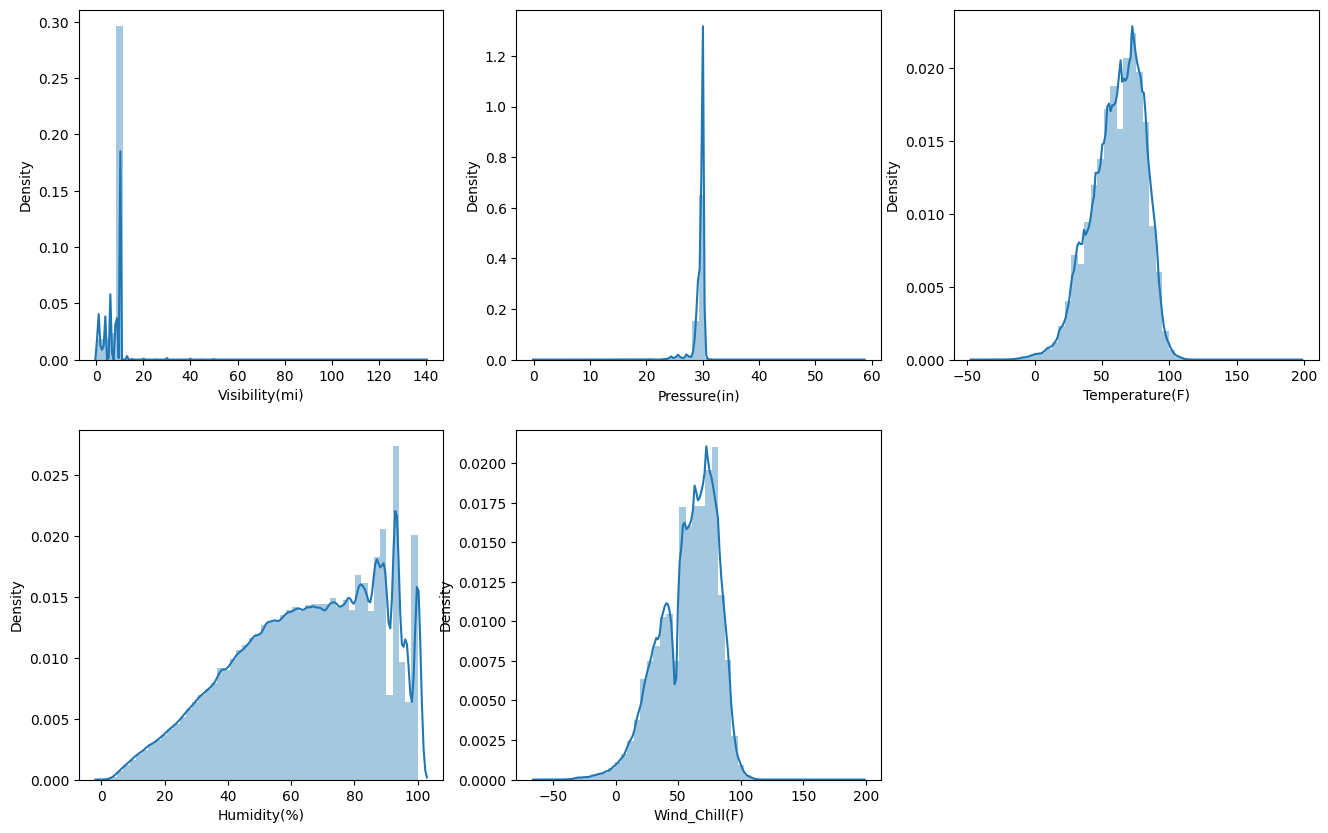

In [12]:
plt.figure(figsize=(16,10))
plt.subplot(231)
sns.distplot(df_copy['Visibility(mi)'])

plt.subplot(232)
sns.distplot(df_copy['Pressure(in)'])

plt.subplot(233)
sns.distplot(df_copy['Temperature(F)'])

plt.subplot(234)
sns.distplot(df_copy['Humidity(%)'])

plt.subplot(235)
sns.distplot(df_copy['Wind_Chill(F)'])


plt.show()

In [13]:
col = ['Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)']

for c in col:
    df_copy[c].fillna(df_copy[c].mean(), inplace=True)

In [15]:
df_copy.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3301235
End_Lng                  3301235
Distance(mi)                   0
Description                    0
Street                         0
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)                  0
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)                0
Precipitation(in)              0
Weather_Condition              0
Amenity                        0
Bump      

In [16]:
df_copy['Country'].value_counts()

Country
US    7426729
Name: count, dtype: int64

In [17]:
df_copy.duplicated().sum()

0

In [14]:
df_copy = df_copy.drop(['Country'], axis=1)

In [19]:
df_copy.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,58.287731,91.0,29.68,10.0,Calm,7.691129,0.020000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,58.287731,100.0,29.65,10.0,Calm,7.691129,0.000000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.300000,100.0,29.67,10.0,SW,3.500000,0.008021,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.000000,96.0,29.64,9.0,SW,4.600000,0.008021,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.300000,89.0,29.65,6.0,SW,3.500000,0.008021,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [29]:
df_copy.shape

(7426729, 45)

In [21]:
df_copy['State'].value_counts()

State
CA    1671194
FL     849818
TX     566645
SC     371114
NY     338861
NC     330768
PA     285413
VA     280302
MN     185003
OR     174458
IL     166491
TN     165671
GA     163927
AZ     162210
MI     160721
LA     146529
NJ     131410
OH     116111
MD     110682
WA     106459
AL      98278
CO      87917
UT      87003
OK      82519
MO      72599
CT      70029
IN      64964
MA      58883
WI      34204
KY      31645
NE      28404
MT      26596
IA      25016
AR      21069
NV      21024
KS      17953
DC      17434
RI      16173
MS      14640
DE      13837
WV      13061
ID      10087
NM      10068
NH       9983
WY       3007
ND       2785
ME       2644
VT        884
SD        236
Name: count, dtype: int64

In [22]:
state_counts = df["State"].value_counts()

# states DataFrame
states = pd.DataFrame(state_counts).reset_index()

# rename the columns
states.rename(columns={'State': 'state_code', 'count': 'cases'}, inplace=True)

# sort the DataFrame by cases (the no. of accidents)
states = states.sort_values(by='cases', ascending=False)

# print the sorted DataFrame
states.head()

,state_code,cases
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960


In [23]:
us_states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

In [24]:
# Add a new column 'State_Name' based on 'State_Code'
states['state'] = states['state_code'].map(us_states)

# Display the updated DataFrame
states.head()

,state_code,cases,state
0,CA,1741433,California
1,FL,880192,Florida
2,TX,582837,Texas
3,SC,382557,South Carolina
4,NY,347960,New York


Text(0.5, 1.0, 'Top 10 states with the highest number of accidents\n')

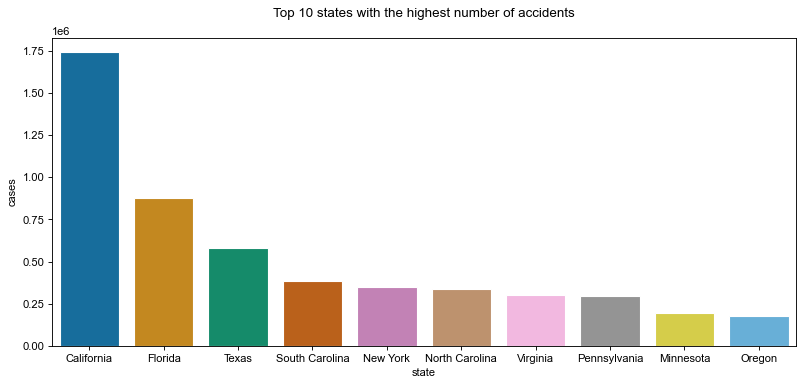

In [25]:
fig, ax = plt.subplots(figsize = (12,5), dpi = 80)
sns.set_style('ticks')

top_10 = states[:10]

sns.barplot(x=top_10['state'], y=top_10['cases'], palette='colorblind')

plt.title("Top 10 states with the highest number of accidents\n")

In [26]:
df_copy['Source'].value_counts()

Source
Source1    4125494
Source2    3207243
Source3      93992
Name: count, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

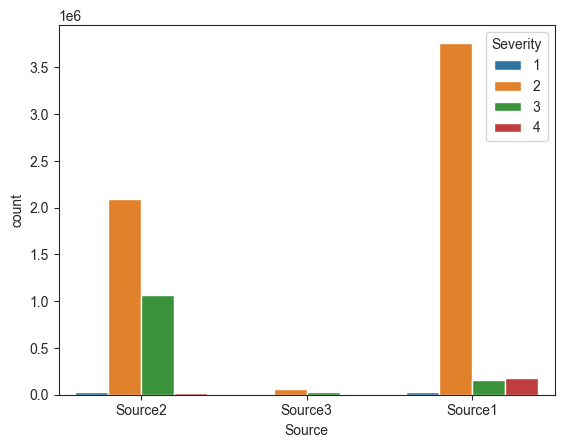

In [27]:
sns.countplot(x=df_copy['Source'], hue=df_copy['Severity'])

In [28]:
df_copy['Severity'].value_counts()

Severity
2    5915757
3    1254088
4     191700
1      65184
Name: count, dtype: int64

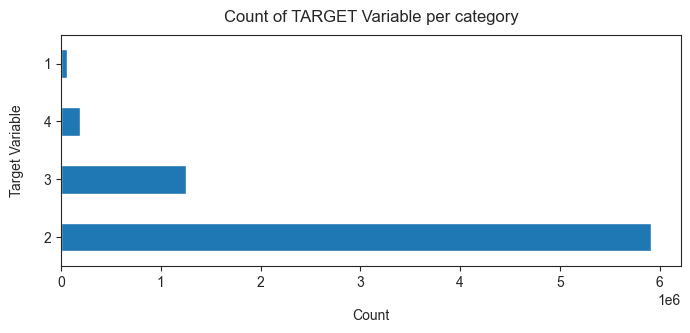

In [29]:
df_copy['Severity'].value_counts().plot(kind='barh', figsize=(8, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [15]:
df_copy = df_copy.drop(['End_Lng', 'End_Lat'], axis=1)

In [31]:
cities = pd.DataFrame(df_copy["City"].value_counts()).reset_index().sort_values(by='count',ascending=False)
cities = cities.rename(columns={'City':'city','count':'cases'})

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Miami'),
  Text(1, 0, 'Houston'),
  Text(2, 0, 'Los Angeles'),
  Text(3, 0, 'Charlotte'),
  Text(4, 0, 'Dallas'),
  Text(5, 0, 'Orlando'),
  Text(6, 0, 'Austin'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Nashville'),
  Text(9, 0, 'Baton Rouge')])

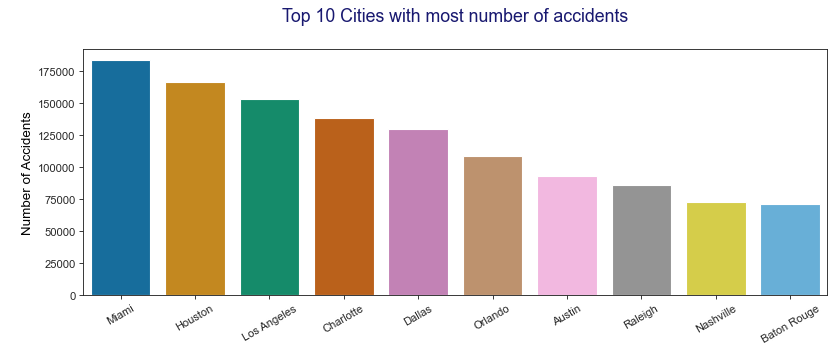

In [32]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 80)
sns.set_style('ticks')

sns.barplot(x=cities[:10].city, y=cities[:10].cases, palette='colorblind')
plt.title("Top 10 Cities with most number of accidents\n", fontdict = {'fontsize':16, 'color':'MidnightBlue'})
plt.ylabel("\nNumber of Accidents", fontdict = {'fontsize':12, 'color':'black'})
plt.xlabel(None)
plt.xticks(rotation=30)

In [33]:
# convert the Start_Time and End_Time attributes to datetime
df_copy["Start_Time"] = pd.to_datetime(df_copy["Start_Time"], format="mixed", errors='coerce', dayfirst=True)
df_copy["End_Time"] = pd.to_datetime(df_copy["End_Time"], format="mixed", errors='coerce', dayfirst=True)

# Extract year, month, weekday and day
df_copy["Year"] = df_copy["Start_Time"].dt.year
df_copy["Month"] = df_copy["Start_Time"].dt.month
df_copy["Weekday"] = df_copy["Start_Time"].dt.weekday
df_copy["Day"] = df_copy["Start_Time"].dt.day
df_copy["Hour"] = df_copy["Start_Time"].dt.hour

In [34]:
year_df = pd.DataFrame(df_copy['Year'].value_counts()).reset_index().sort_values(by='Year', ascending=True)
year = year_df.rename(columns={'Year':'year','count':'cases'})
year

,year,cases
6,2016,397994
5,2017,694984
4,2018,865720
3,2019,925134
2,2020,1131090
1,2021,1502521
0,2022,1674707
7,2023,234579


<AxesSubplot:title={'center':'Severity'}, ylabel='count'>

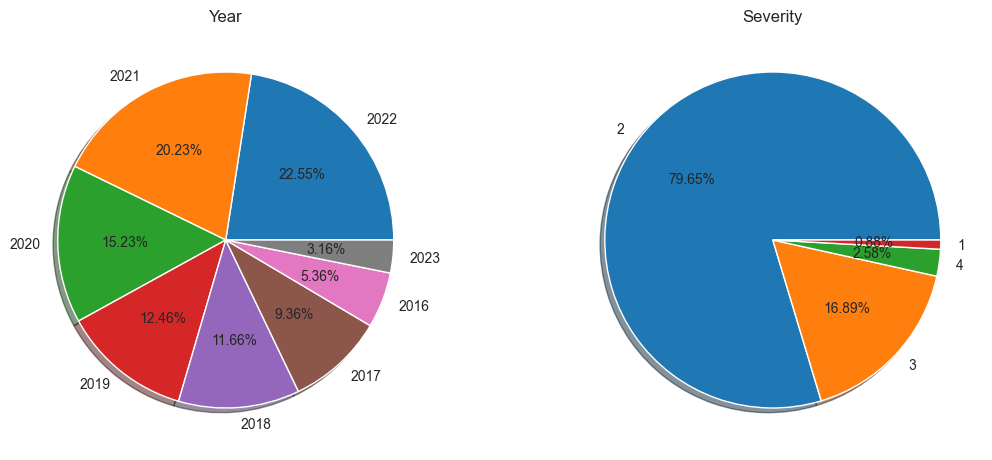

In [35]:
plt.figure(figsize=(20,12))
plt.subplot(231)
plt.axis('off')
plt.title('Year')
df_copy['Year'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(232)
plt.axis('off')
plt.title('Severity')
df_copy['Severity'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')




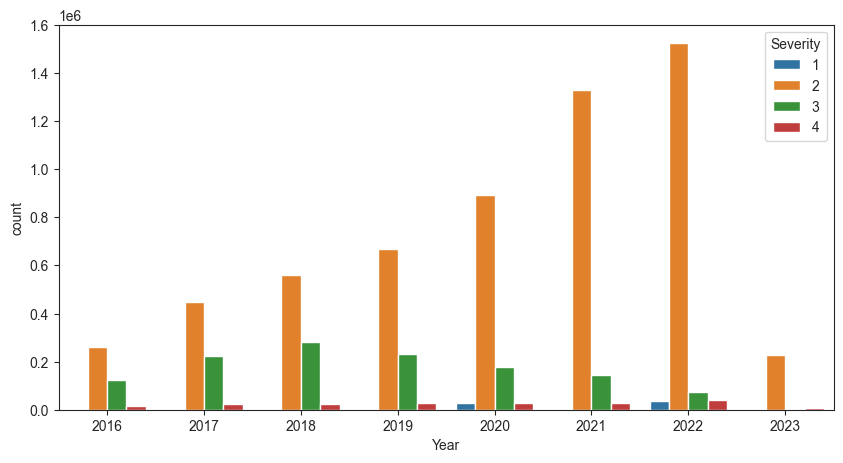

In [36]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df_copy['Year'],hue=df_copy['Severity'])


<AxesSubplot:xlabel='Month', ylabel='count'>

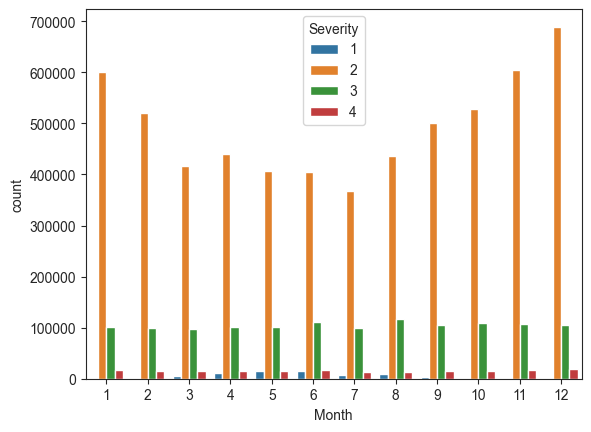

In [37]:
sns.countplot(x=df_copy['Month'], hue=df_copy['Severity'])

In [38]:
month_df = pd.DataFrame(df_copy.Start_Time.dt.month.value_counts()).reset_index()
month = month_df.rename(columns={'Start_Time':'month','count':'cases'}).sort_values(by='month', ascending=True)

# adding month name as a column
month_map = {1:'Jan' , 2:'Feb' , 3:'Mar' , 4:'Apr' , 5:'May' , 6:'Jun', 7:'Jul' , 8:'Aug', 9:'Sep',10:'Oct' , 11:'Nov' , 12:'Dec'}
month['month_name'] = month['month'].map(month_map)

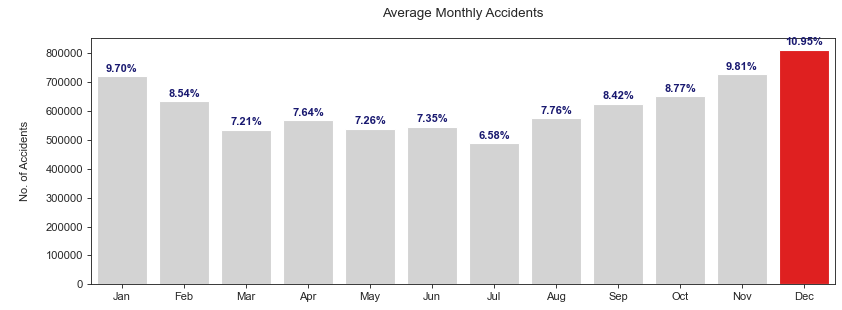

In [39]:
fig, ax = plt.subplots(figsize = (12,4), dpi = 80)
sns.set_style('ticks')

colors = ['red' if val == max(month['cases']) else 'lightgrey' for val in month['cases']]

sns.barplot(x=month.month_name, y=month.cases, palette=colors)

ax.set_title('Average Monthly Accidents\n')
ax.set_ylabel("\nNo. of Accidents\n")
ax.set_xlabel(None)

total_accidents = df_copy.shape[0]
# Customize Y-axis tick labels to show real numbers
def format_func(value, _):
    return f'{value:.0f}'  # Format as whole numbers
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

for p in ax.patches :
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
            height + 15000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 10, weight='bold', color='MidnightBlue')


In [40]:
day = pd.DataFrame(df_copy['Start_Time'].dt.dayofweek.value_counts()).reset_index()
day = day.rename(columns={'Start_Time':'day_of_week', 'count':'cases'}).sort_values(by='day_of_week')
day_map = {0:'Monday' , 1:'Tuesday' , 2:'Wednesday' , 3:"Thursday" , 4:'Friday' , 5:"Saturday" , 6:'Sunday'}   
day['weekday'] = day['day_of_week'].map(day_map)

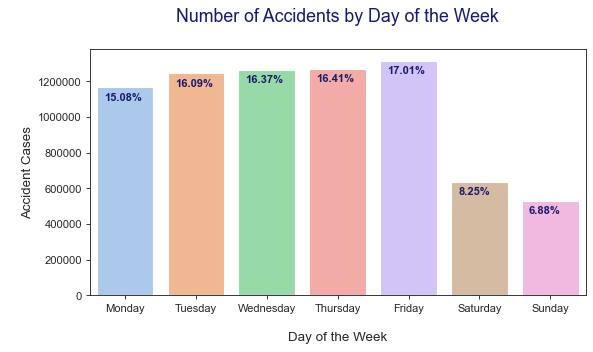

In [41]:
fig, ax = plt.subplots(figsize = (8,4), dpi = 80)
sns.set_style('ticks') 

ax=sns.barplot(y=day.cases, x=day.weekday, palette='pastel')
plt.title('Number of Accidents by Day of the Week\n', size=16, color='MidnightBlue')
plt.ylabel('\nAccident Cases', fontsize=12)
plt.xlabel('\nDay of the Week', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

total = df.shape[0]

def format_func(value, _):
    return f'{value:.0f}'  # Format as whole numbers
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-55000,
    str(round((i.get_height()/total)*100, 2))+'%',
    va = "center", fontsize=10, weight='bold', color='MidnightBlue')

In [42]:
hour_of_day = pd.DataFrame(df_copy['Hour'].value_counts()).reset_index().rename(columns={'Hour':'hour','count':'cases'})
hour_of_day.sort_values(by='hour', inplace=True)

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

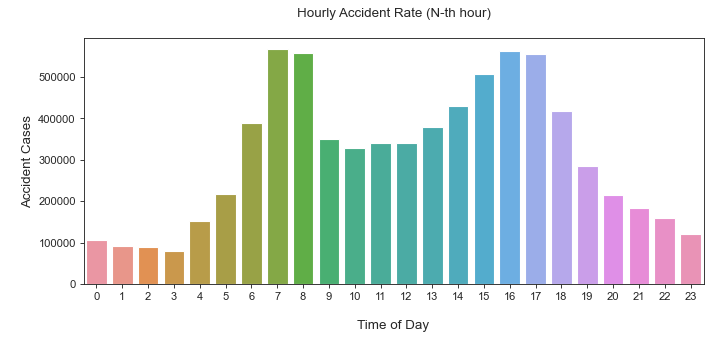

In [43]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)
sns.set_style('ticks')

sns.barplot(x=hour_of_day.hour, y=hour_of_day.cases)

plt.title('Hourly Accident Rate (N-th hour)\n')
plt.ylabel('\nAccident Cases', fontsize=12)
plt.xlabel('\nTime of Day', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7426729 entries, 0 to 7728393
Data columns (total 48 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Timezone               object        
 15  Airport_Code           object        
 16  Weather_Timestamp      object        
 17  Temperature(F)         float64       
 18  Wind_Chill(F)          floa

In [16]:
df_copy = df_copy.drop(['Turning_Loop'], axis=1)

In [46]:
print("No. of Weather Conditions:", len(df_copy["Weather_Condition"].unique()))

# To view the complete list of 142 weather descriptions, run the following code
print("\nList of unique weather conditions:", list(df_copy["Weather_Condition"].unique()))

No. of Weather Conditions: 142

List of unique weather conditions: ['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow', 'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow', 'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog', 'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', 'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog', 'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain', 'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand', 'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy', 'Rain Showers', 'Light Rain / Windy', 'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Light Rain Shower', 'Light Rain with Thunder', 'Mostly Cloudy / Windy', 'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm', 'Heavy Thunderstorms and Rain', 'Thunderstorm', 'Thunder', 'Heavy T-Storm', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow', 'Light Thunderstorms and Snow', 'Heavy Snow', 'Low Drifting Snow', 'Light

In [47]:
df_copy.loc[df_copy["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df_copy.loc[df_copy["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df_copy.loc[df_copy["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df_copy.loc[df_copy["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df_copy.loc[df_copy["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df_copy.loc[df_copy["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df_copy.loc[df_copy["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df_copy.loc[df_copy["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df_copy.loc[df_copy["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df_copy.loc[df_copy["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df_copy.loc[df_copy["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

In [48]:
wc = pd.DataFrame(df_copy['Weather_Condition'].value_counts()).reset_index().sort_values(by='count', ascending=False)
wc.rename(columns={'Weather_Condition':'weather_condition', 'count':'frequency'}, inplace=True)
# wc stands for weather condition

Text(0.5, 1.0, '\nTop Weather Conditions Contributing to Accidents\n')

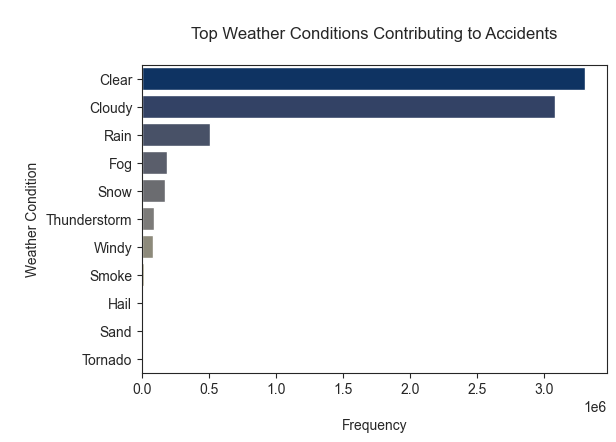

In [49]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
sns.set_style('ticks')
sns.barplot(x='frequency', y='weather_condition', data=wc, palette='cividis', orient='h')

# Add labels and title
ax.set_xlabel('\nFrequency')
ax.set_ylabel('\nWeather Condition')
ax.set_title('\nTop Weather Conditions Contributing to Accidents\n')

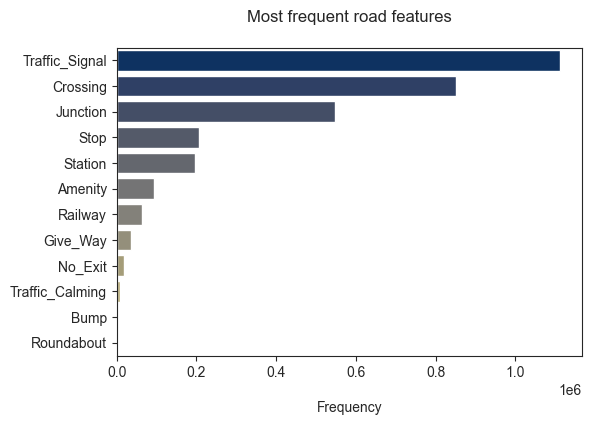

In [50]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", 
                 "Junction", "No_Exit", "Railway", "Roundabout", 
                 "Station", "Stop", "Traffic_Calming", "Traffic_Signal"]

data = df_copy[road_features].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=data.values, y=data.index, orient="h", palette='cividis')
plt.title("Most frequent road features\n")
plt.xlabel("\nFrequency")

plt.show()

In [51]:
df_copy['Temperature(F)'].mean()

61.68756720488927

In [52]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7426729 entries, 0 to 7728393
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Timezone               object        
 15  Airport_Code           object        
 16  Weather_Timestamp      object        
 17  Temperature(F)         float64       
 18  Wind_Chill(F)          floa

In [53]:
# state wise temperature distribution
temp_state=df_copy.groupby('State')['Temperature(F)'].mean().reset_index().sort_values(by = "Temperature(F)",ascending=False)
temp_state.head()

,State,Temperature(F)
8,FL,75.418685
2,AZ,72.582514
16,LA,70.055478
41,TX,69.878338
0,AL,66.470903


In [54]:
temp_state['Temperature(F)'].mean()

55.01600719530579

In [55]:
temp_state.loc[temp_state['Temperature(F)'] <= 55, 'State_condition'] = 'Cold' 
temp_state.loc[temp_state['Temperature(F)'] > 55, 'State_condition'] = 'Hot' 

In [56]:
temp_state.head()

,State,Temperature(F),State_condition
8,FL,75.418685,Hot
2,AZ,72.582514,Hot
16,LA,70.055478,Hot
41,TX,69.878338,Hot
0,AL,66.470903,Hot


In [57]:
state_count=df_copy.groupby('State').count().reset_index()

In [58]:
state_count_sort=state_count.sort_values(by = "ID",ascending=False)

In [59]:
state_count_sort=state_count_sort.iloc[:,[0,1]]
state_count_sort.head(5)

,State,ID
3,CA,1671194
8,FL,849818
41,TX,566645
38,SC,371114
32,NY,338861


In [60]:
final_table=pd.merge(temp_state,state_count_sort,on='State')
final_table=final_table.sort_values(by = "ID",ascending=False)
final_table.head(15)

,State,Temperature(F),State_condition,ID
8,CA,63.898751,Hot,1671194
0,FL,75.418685,Hot,849818
3,TX,69.878338,Hot,566645
6,SC,64.505189,Hot,371114
22,NY,54.800544,Cold,338861
10,NC,62.839464,Hot,330768
30,PA,53.208243,Cold,285413
14,VA,59.204809,Hot,280302
45,MN,37.654692,Cold,185003
36,OR,51.232619,Cold,174458


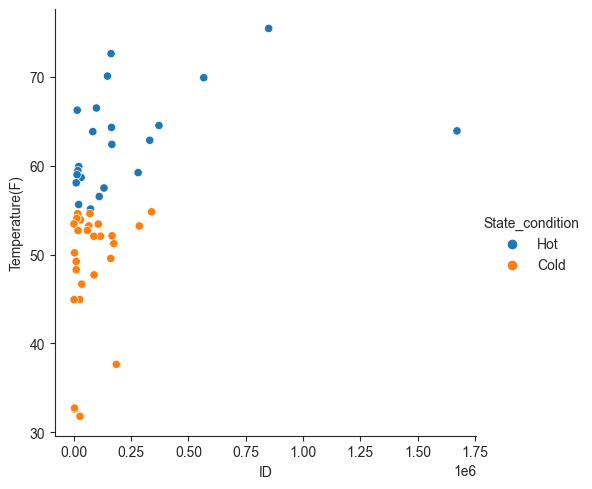

In [61]:
sns.relplot(x='ID',y='Temperature(F)',hue='State_condition',data=final_table)

In [62]:
street_df = pd.DataFrame(df_copy['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})
top_ten_streets_df = pd.DataFrame(street_df.head(10))
top_ten_streets_df

,Cases,count
0,I-95 N,74389
1,I-95 S,70592
2,I-5 N,70208
3,I-10 E,53820
4,I-10 W,52078
5,I-5 S,50452
6,I-80 W,37412
7,I-80 E,33966
8,I-405 N,32117
9,I-75 N,27286


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

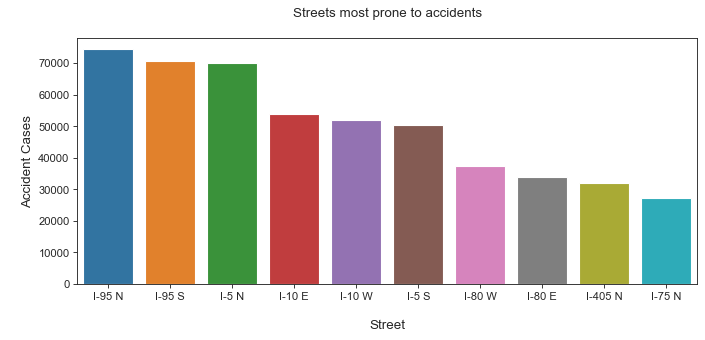

In [63]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

ax=sns.barplot(y=top_ten_streets_df['count'], x=top_ten_streets_df['Cases'])

plt.title('Streets most prone to accidents\n')
plt.ylabel('\nAccident Cases', fontsize=12)
plt.xlabel('\nStreet', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

In [64]:
accident_duration_df = pd.DataFrame(df_copy['End_Time'] - df_copy['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})
accident_duration_df

,Id,Duration
0,0,0 days 05:14:00
1,1,0 days 00:30:00
2,2,0 days 00:30:00
3,3,0 days 00:30:00
4,4,0 days 00:30:00
...,...,...
7426724,7728389,0 days 00:28:36
7426725,7728390,0 days 00:26:53
7426726,7728391,0 days 00:28:28
7426727,7728392,0 days 00:29:21


In [65]:
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Duration':'Cases'})
top_10_accident_duration_df

,Cases,count
0,0 days 00:45:00,67690
1,0 days 00:29:47,53434
2,0 days 00:29:44,52723
3,0 days 01:15:00,59141
4,0 days 01:00:00,58774
5,0 days 06:00:00,355652
6,0 days 00:30:00,112278
7,0 days 00:29:46,54315
8,0 days 04:00:00,55819
9,0 days 00:29:45,54466


In [66]:
Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Cases]
top_10_accident_duration_df['Cases'] = Duration

Text(0, 0.5, '\nAccident Cases\n')

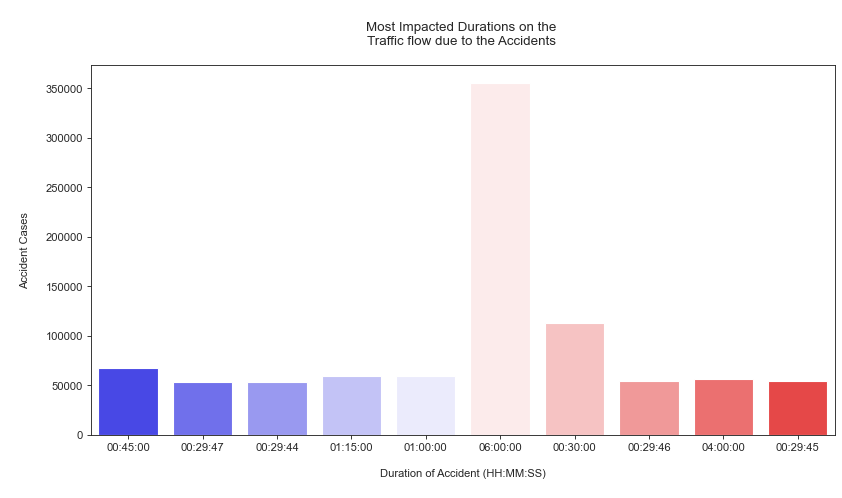

In [67]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=top_10_accident_duration_df['count'], x=top_10_accident_duration_df['Cases'], palette='bwr')

plt.title('\nMost Impacted Durations on the \nTraffic flow due to the Accidents \n')

ax.set_xlabel('\nDuration of Accident (HH:MM:SS)\n')
ax.set_ylabel('\nAccident Cases\n')

In [68]:
year_df = pd.DataFrame(df_copy.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'index':'Year', 'Start_Time':'Cases'}).sort_values(by='Cases', ascending=True)
year_df

,Cases,count
6,2016,397994
5,2017,694984
4,2018,865720
3,2019,925134
2,2020,1131090
1,2021,1502521
0,2022,1674707
7,2023,234579


In [69]:
year_df['accident/day'] = round(year_df['count']/(5*365))
year_df['accident/hour'] = round(year_df['count']/(5*365*24))
year_df

,Cases,count,accident/day,accident/hour
6,2016,397994,218.0,9.0
5,2017,694984,381.0,16.0
4,2018,865720,474.0,20.0
3,2019,925134,507.0,21.0
2,2020,1131090,620.0,26.0
1,2021,1502521,823.0,34.0
0,2022,1674707,918.0,38.0
7,2023,234579,129.0,5.0


Text(0.5, 0, 'year')

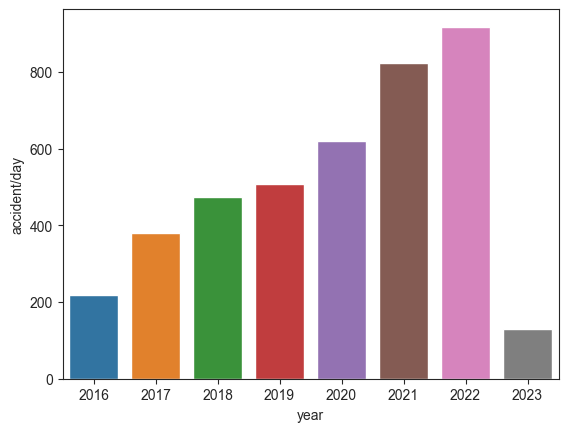

In [70]:
sns.barplot(y=year_df['accident/day'], x=year_df['Cases'])
plt.xlabel("year")

Text(0.5, 0, 'year')

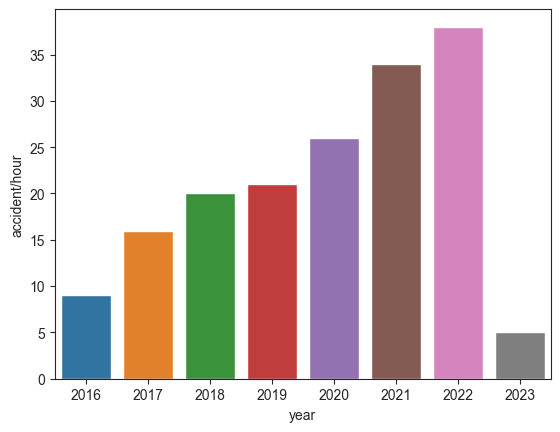

In [71]:
sns.barplot(y=year_df['accident/hour'], x=year_df['Cases'])
plt.xlabel("year")

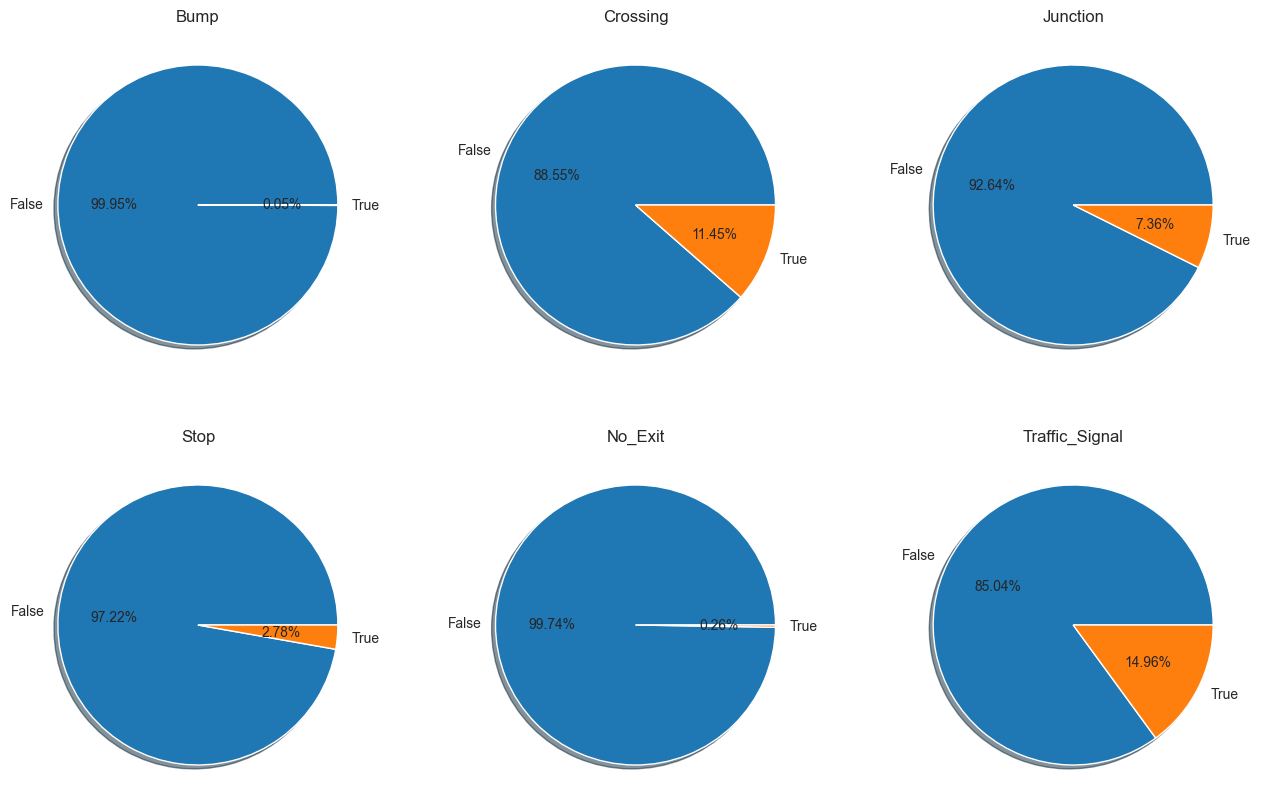

In [72]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('Bump')
df_copy['Bump'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(232)
plt.axis('off')
plt.title('Crossing')
df_copy['Crossing'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(233)
plt.axis('off')
plt.title('Junction')
df_copy['Junction'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(234)
plt.axis('off')
plt.title('Stop')
df_copy['Stop'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(235)
plt.axis('off')
plt.title('No_Exit')
df_copy['No_Exit'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(236)
plt.axis('off')
plt.title('Traffic_Signal')
df_copy['Traffic_Signal'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.show()

In [73]:
timezone_df = pd.DataFrame(df_copy['Timezone'].value_counts()).reset_index().rename(columns={'index':'Timezone', 'Timezone':'Cases'})
timezone_df

,Cases,count
0,US/Eastern,3435499
1,US/Pacific,1987539
2,US/Central,1597426
3,US/Mountain,406265


Text(0.5, 0, 'Timezones')

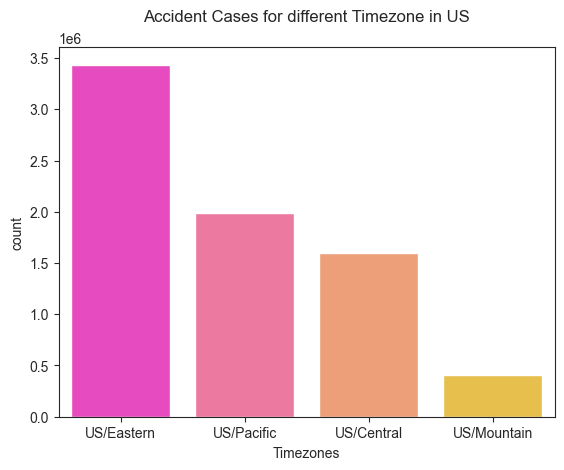

In [74]:
sns.barplot(y=timezone_df['count'], x=timezone_df['Cases'], palette='spring')
plt.title("Accident Cases for different Timezone in US\n")
plt.xlabel("Timezones")

<AxesSubplot:xlabel='Temperature(F)', ylabel='Density'>

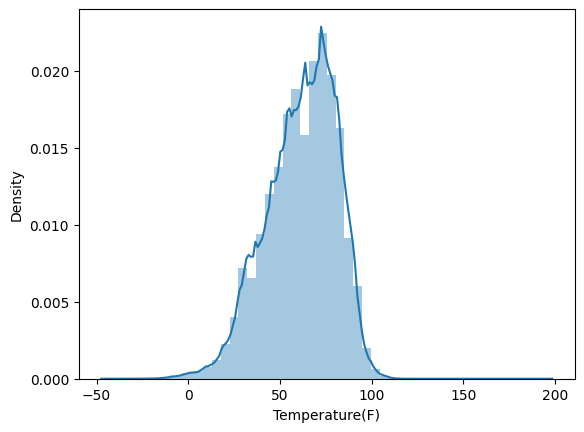

In [17]:
sns.distplot(df_copy['Temperature(F)'])

In [39]:
df_copy['Pressure(in)'].max()

58.63

In [87]:
labels=["{0} - {1}".format(i,i+29) for i in range(-45, 190, 30)]
df_copy['Temperature(F)_group']=pd.cut(df_copy['Temperature(F)'], range(-45, 200, 30), right=False, labels=labels)

In [32]:
labels=["{0} - {1}".format(i,i+9) for i in range(1, 90, 10)]
df_copy['Humidity(%)_group']=pd.cut(df_copy['Humidity(%)'], range(1, 100, 10), right=False, labels=labels)

In [43]:
labels=["{0} - {1}".format(i,i+5) for i in range(0, 50, 6)]
df_copy['Pressure(in)_group']=pd.cut(df_copy['Pressure(in)'], range(0, 60, 6), right=False, labels=labels)

In [ ]:
labels=["{0} - {1}".format(i,i+9) for i in range(-45, 190, 10)]
df_copy['Temperature(F)_group']=pd.cut(df_copy['Temperature(F)'], range(-45, 200, 10), right=False, labels=labels)

In [33]:
df_copy['Humidity(%)_group'].value_counts()

Humidity(%)_group
81 - 90    1258423
71 - 80    1060341
61 - 70    1046556
51 - 60     971850
41 - 50     809901
31 - 40     594938
21 - 30     383670
11 - 20     211564
1 - 10       54373
Name: count, dtype: int64

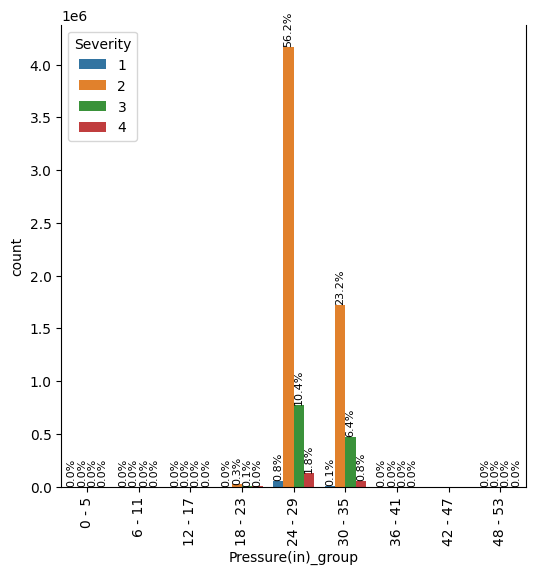

In [62]:
plt.figure(figsize=(6,6))
ax=sns.countplot(data=df_copy, x=df_copy['Pressure(in)_group'], hue=df_copy['Severity'])
plt.xticks(rotation=90)
total = len(df_copy['Pressure(in)_group'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', rotation=90, fontsize=8)
    
ax.spines['top'].set_visible(False)  


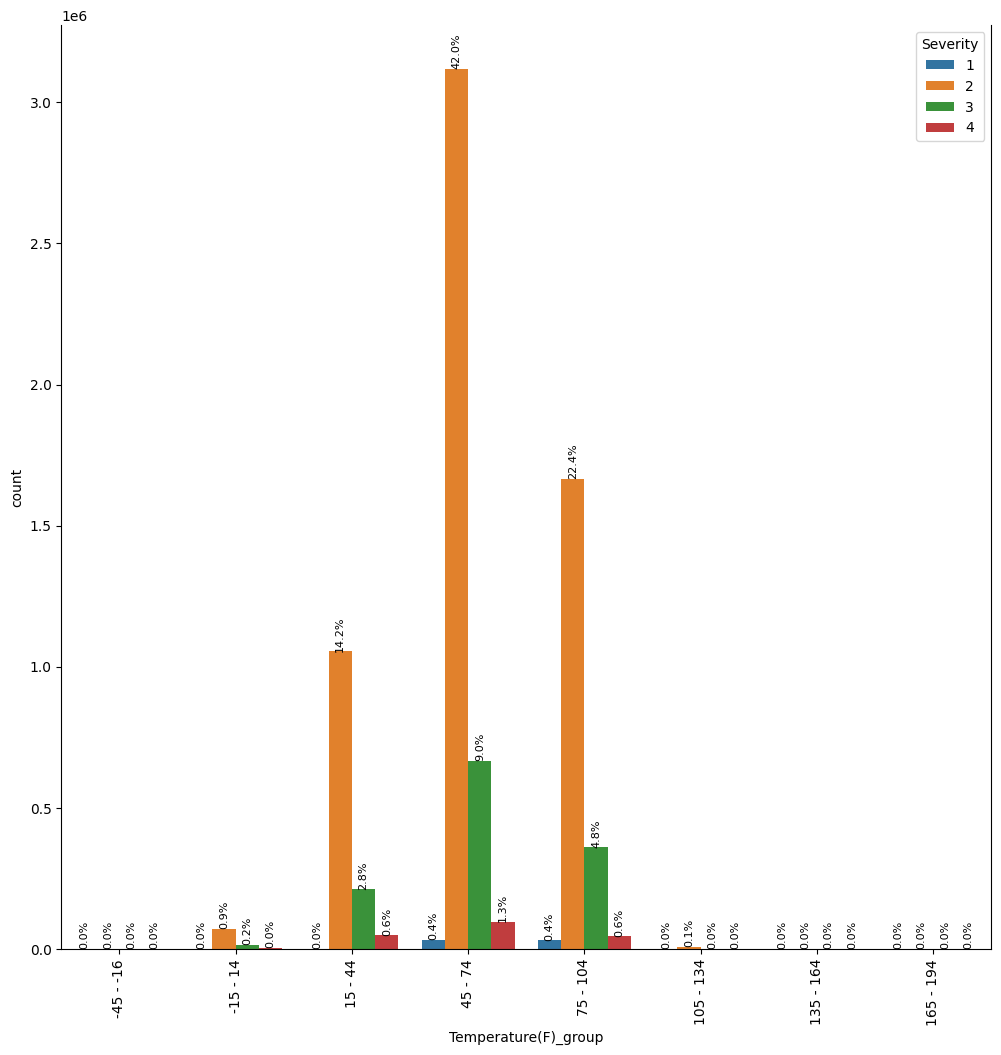

In [88]:
plt.figure(figsize=(12,12))
ax=sns.countplot(data=df_copy, x=df_copy['Temperature(F)_group'], hue=df_copy['Severity'])
plt.xticks(rotation=90)
total = len(df_copy['Pressure(in)_group'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', rotation=90, fontsize=8)
    
ax.spines['top'].set_visible(False)  


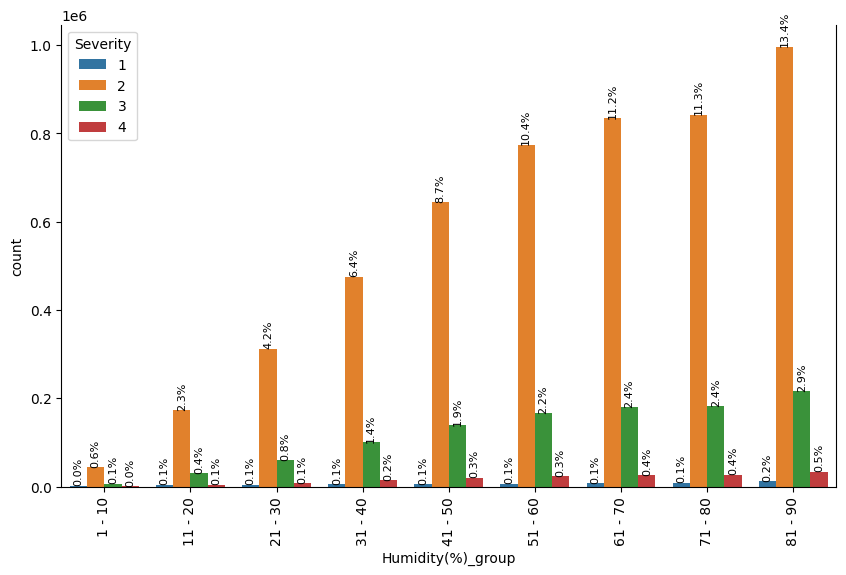

In [66]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df_copy, x=df_copy['Humidity(%)_group'], hue=df_copy['Severity'])
plt.xticks(rotation=90)
total = len(df_copy['Humidity(%)_group'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', rotation=90, fontsize=8)
    
ax.spines['top'].set_visible(False)  


In [69]:
df_copy.shape

(7426729, 45)

In [70]:
df_copy.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temperature(F)_group,Humidity(%)_group,Pressure(in)_group
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,58.287731,91.0,29.68,10.0,Calm,7.691129,0.020000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,30 - 39,NaN,24 - 29
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,58.287731,100.0,29.65,10.0,Calm,7.691129,0.000000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,30 - 39,NaN,24 - 29
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.300000,100.0,29.67,10.0,SW,3.500000,0.008021,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Night,Night,Day,Day,30 - 39,NaN,24 - 29
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.000000,96.0,29.64,9.0,SW,4.600000,0.008021,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,30 - 39,NaN,24 - 29
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.300000,89.0,29.65,6.0,SW,3.500000,0.008021,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,30 - 39,81 - 90,24 - 29


In [77]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7426729 entries, 0 to 7728393
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Timezone               object        
 15  Airport_Code           object        
 16  Weather_Timestamp      object        
 17  Temperature(F)         float64       
 18  Wind_Chill(F)          floa

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [72]:
df_copy_train=df.copy()

In [73]:
df_copy_train.drop(columns=['ID', 'Description', 'End_Lat', 'End_Lng', 'Country', 'Turning_Loop'], inplace=True)

In [74]:
df_copy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   Distance(mi)           float64
 7   Street                 object 
 8   City                   object 
 9   County                 object 
 10  State                  object 
 11  Zipcode                object 
 12  Timezone               object 
 13  Airport_Code           object 
 14  Weather_Timestamp      object 
 15  Temperature(F)         float64
 16  Wind_Chill(F)          float64
 17  Humidity(%)            float64
 18  Pressure(in)           float64
 19  Visibility(mi)         float64
 20  Wind_Direction         object 
 21  Wind_Speed(mph)        float64
 22  Precipitation(in) 

In [75]:
df_copy_train.isnull()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7728390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7728391,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7728392,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [76]:
df_copy_train.dropna(subset=['Visibility(mi)', 'Wind_Direction', 'Humidity(%)', 'Weather_Condition', 
                       'Temperature(F)', 'Pressure(in)', 'Sunrise_Sunset', 'Street', 'Zipcode'], inplace=True)

In [77]:
col = ['Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)']

for c in col:
    df_copy_train[c].fillna(df_copy_train[c].mean(), inplace=True)

In [78]:
categorical_columns = df_copy_train.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['Source', 'Start_Time', 'End_Time', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [79]:
from sklearn import preprocessing

for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df_copy_train[i]= en.fit_transform(df_copy_train[i])

In [80]:
df_copy_train.head()

,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,1,3,2,22,39.865147,-84.058723,0.01,219481,2609,1092,33,442329,1,699,4,36.9,58.287735,91.0,29.68,10.0,1,7.691129,0.020000,61,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
1,1,2,4,1,39.928059,-82.831184,0.01,166545,9136,578,33,424403,1,418,2,37.9,58.287735,100.0,29.65,10.0,1,7.691129,0.000000,61,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
2,1,2,6,2,39.063148,-84.032608,0.01,298414,11944,335,33,435010,1,959,6,36.0,33.300000,100.0,29.67,10.0,16,3.500000,0.008021,87,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
3,1,3,8,3,39.747753,-84.205582,0.01,219507,2609,1092,33,441402,1,506,7,35.1,31.000000,96.0,29.64,9.0,16,4.600000,0.008021,84,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,2,9,4,39.627781,-84.188354,0.01,239576,2609,1092,33,443288,1,1225,10,36.0,33.300000,89.0,29.65,6.0,16,3.500000,0.008021,84,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [81]:
columns = ['Street', 'City', 'Temperature(F)', 'Visibility(mi)', 'Weather_Condition', 'Wind_Chill(F)', 'Severity' ]

In [82]:
df_for_accuracy = df_copy_train[columns].copy()

In [83]:
df_for_accuracy.head()

,Street,City,Temperature(F),Visibility(mi),Weather_Condition,Wind_Chill(F),Severity
0,219481,2609,36.9,10.0,61,58.287735,3
1,166545,9136,37.9,10.0,61,58.287735,2
2,298414,11944,36.0,10.0,87,33.300000,2
3,219507,2609,35.1,9.0,84,31.000000,3
4,239576,2609,36.0,6.0,84,33.300000,2


In [84]:
df_for_accuracy.to_csv('road accident data for accuracy and training(all num).csv')

In [35]:
Severity_desc = []
for i,r in df_for_accuracy.iterrows():
    if r["Severity"] == 1: Severity_desc.append("low")
    elif r["Severity"] == 2: Severity_desc.append("moderate")
    elif r["Severity"] == 3: Severity_desc.append("significant")
    else: Severity_desc.append("extreme")
    

df_for_accuracy["Severity"] = Severity_desc
df_for_accuracy["Severity"].value_counts()

Severity
moderate       5915759
significant    1254090
extreme         191700
low              65184
Name: count, dtype: int64

In [36]:
df_for_accuracy.head()

,Street,City,Temperature(F),Visibility(mi),Weather_Condition,Wind_Chill(F),Severity
0,219481,2609,36.9,10.0,61,58.287735,significant
1,166545,9136,37.9,10.0,61,58.287735,moderate
2,298414,11944,36.0,10.0,87,33.300000,moderate
3,219507,2609,35.1,9.0,84,31.000000,significant
4,239576,2609,36.0,6.0,84,33.300000,moderate


In [37]:
df_for_accuracy.to_csv('road accident data for accuracy and training.csv')

In [88]:
# df_copy_train.to_csv('road accident data numeric.csv')

In [89]:
x=df_copy_train.drop('Severity', axis=1)
x

,Source,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,Zipcode,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,1,2,22,39.865147,-84.058723,0.010,219481,2609,1092,33,442329,1,699,4,36.9,58.287735,91.0,29.68,10.0,1,7.691129,0.020000,61,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
1,1,4,1,39.928059,-82.831184,0.010,166545,9136,578,33,424403,1,418,2,37.9,58.287735,100.0,29.65,10.0,1,7.691129,0.000000,61,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
2,1,6,2,39.063148,-84.032608,0.010,298414,11944,335,33,435010,1,959,6,36.0,33.300000,100.0,29.67,10.0,16,3.500000,0.008021,87,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
3,1,8,3,39.747753,-84.205582,0.010,219507,2609,1092,33,441402,1,506,7,35.1,31.000000,96.0,29.64,9.0,16,4.600000,0.008021,84,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,9,4,39.627781,-84.188354,0.010,239576,2609,1092,33,443288,1,1225,10,36.0,33.300000,89.0,29.65,6.0,16,3.500000,0.008021,84,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,0,2330080,2325223,34.002480,-117.379360,0.543,268218,9244,1365,3,688668,3,1583,412555,86.0,86.000000,40.0,28.92,10.0,20,13.000000,0.000000,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7728390,0,2330225,2325443,32.766960,-117.148060,0.338,219547,9645,1425,3,682359,3,1329,412577,70.0,70.000000,73.0,29.39,10.0,16,6.000000,0.000000,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7728391,0,2330208,2325417,33.775450,-117.847790,0.561,205615,8083,1197,3,695501,3,1752,412577,73.0,73.000000,64.0,29.74,10.0,15,10.000000,0.000000,90,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7728392,0,2330208,2325419,33.992460,-118.403020,0.772,289447,2494,944,3,659756,3,1747,412575,71.0,71.000000,81.0,29.62,10.0,16,8.000000,0.000000,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
y=df_copy_train['Severity']
y

0          3
1          2
2          2
3          3
4          2
          ..
7728389    2
7728390    2
7728391    2
7728392    2
7728393    2
Name: Severity, Length: 7426733, dtype: int64

In [91]:
y.value_counts()

Severity
2    5915759
3    1254090
4     191700
1      65184
Name: count, dtype: int64

<BarContainer object of 4 artists>

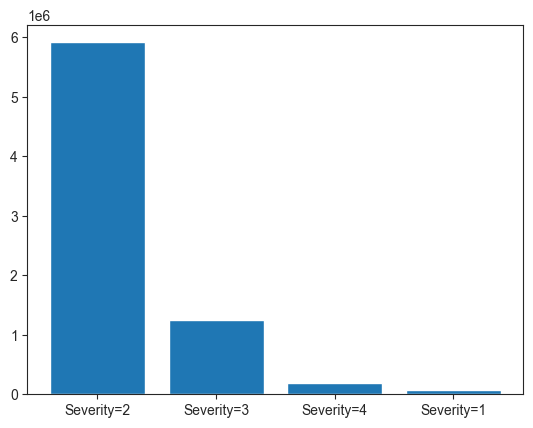

In [92]:
class_names = ['Severity=2', 'Severity=3', 'Severity=4', 'Severity=1']
plt.bar(class_names, y.value_counts())

In [93]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# import tensorflow as tf
import lime
from lime import lime_tabular
import shap

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [95]:
standard_scaler=StandardScaler()
standard_scaler_fit=standard_scaler.fit(x_train)
x_train=standard_scaler_fit.transform(x_train)
x_test=standard_scaler_fit.transform(x_test)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [97]:
model_dt = DecisionTreeClassifier(criterion = "gini",random_state = 100, max_depth=10, min_samples_leaf=8)

# Creating the model on Training Data
model_dt_fit=model_dt.fit(x_train,y_train)
model_dt_pred=model_dt_fit.predict(x_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, model_dt_pred))
print(metrics.confusion_matrix(y_test, model_dt_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, model_dt_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           1       0.69      0.47      0.56     19547
           2       0.90      0.95      0.93   1773575
           3       0.74      0.62      0.67    377354
           4       0.60      0.21      0.32     57544

    accuracy                           0.87   2228020
   macro avg       0.73      0.56      0.62   2228020
weighted avg       0.86      0.87      0.86   2228020

[[   9223    8533    1707      84]
 [   2875 1692114   72989    5597]
 [   1138  141460  232386    2370]
 [     46   38973    6241   12284]]
Accuracy of the model on Testing Sample Data: 0.86


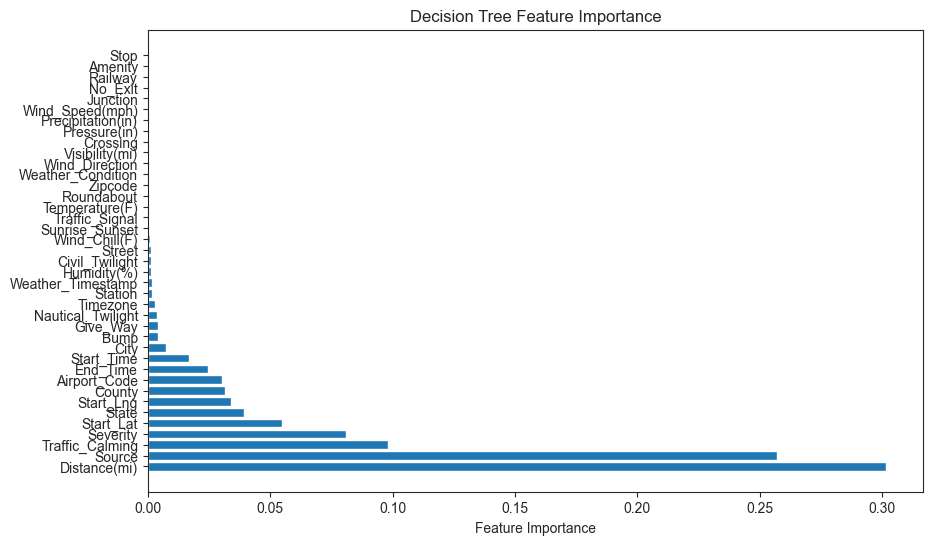

In [101]:
feature_names = df_copy_train.columns.to_list()
feature_importance = model_dt.feature_importances_

# Extract feature names (assuming your features are in a list named 'feature_names')
# Replace 'feature_names' with your actual list of feature names
# For example: feature_names = ['feature1', 'feature2', ...]
# Make sure the order corresponds to your feature importance scores
plt.figure(figsize=(10, 6))

# Sort feature importances in descending order
sorted_idx = feature_importance.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Plot
plt.barh(sorted_feature_names, feature_importance[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()
